In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [3]:
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(['RowNumber'], axis=1)


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [4]:
exited = churn_data['Exited'].value_counts()
labels = ['loyal', 'exited']

fig = px.pie(
    exited, 
    values = exited,
    names = labels,
    title = 'Loyal and exited customers pie',
    
)
fig




### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.


In [6]:
high_balance = churn_data[churn_data['Balance'] > 2500]
def age_classification(row):
    if row < 25:
        return 'young (< 25)'
    if 25 <= row < 45:
        return 'young adult (25 <= and < 45)'
    if 45 <= row < 60: 
        return 'middle age (45 <= and < 60)'
    if 60 <= row < 75: 
        return 'elderly age (60 <= and < 75)'
    if 75 <= row: 
        return 'senile age (> 75)'
    
churn_data['AgeClassification'] = churn_data['Age'].apply(age_classification)
bar_data = high_balance.groupby(['Gender', 'AgeClassification'], as_index=False)['Balance'].sum()
bar_data.columns = ['Gender', 'AgeClassification', 'Sum']

fig = px.bar(
   bar_data,
   x = 'Gender',
   y = 'Sum',
   color = 'AgeClassification', 
   barmode = 'group' 
)
fig.update_layout(title="Распределение баланса пользователей (с более $2500 на счету) по возрастной группе и полу")
fig



### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [ ]:
churn_data['Exited'] = churn_data['Exited'].replace([0, 1], ['loyal', 'exited'])
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].replace([0, 1], ['inactive', 'active'])

In [ ]:
exited_data = churn_data.groupby(['Exited', 'Geography', 'IsActiveMember'], as_index=False)['Balance'].sum()
# exited_data.columns['Exited', 'CreditScore', 'Sum']
exited_data

fig = px.bar(
   exited_data,
   x = 'Exited',
   y = 'Balance',
   color = 'Geography', 
   barmode = 'group',
   facet_row='IsActiveMember',
   text_auto=True, 
   
   
)
fig.update_layout(title="schbsdhbh")
fig


### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [ ]:
fig = px.box(data_frame=churn_data, x = 'Age', color='Exited')
fig

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [ ]:
credit_data = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].mean()
credit_data.columns=['CreditScore', 'Exited', 'Salary']

fig = px.scatter(credit_data,  x='Salary', y = 'CreditScore', color='Exited')
fig

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [ ]:
#меняем 0 и 1 на loyal и exited
churn_data['Exited'] = churn_data['Exited'].replace([0, 1], ['loyal', 'exited'])
# Мое решение:
exited_clients = churn_data[churn_data['Exited'] == 'exited']
pie_data = exited_clients['Gender'].value_counts()

pie_fig = px.pie(pie_data, values = pie_data, names=pie_data.index, hole=0.3, width = 600, height = 400, title='Соотношение ушедших мужчин и женщин')
pie_fig.show()

# # Решение согласно подсказке
# # вернул loyal и exited на 0 и 1 )))  глупое решение, но другого не нашел)
# churn_data['Exited'] = churn_data['Exited'].replace(['loyal', 'exited'], [0, 1])
# bar_data = churn_data.groupby('Gender', as_index=False).mean()
# bar_fig = px.bar(
#     data_frame=bar_data,
#     x='Gender',
#     y='Exited',
#     height=300, 
#     width=700,
#     title = 'Соотношение ушедших мужчин и женщин'
# )
# bar_fig.show()

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
products_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
products_data
bar_data = px.bar(
    products_data, 
    x = 'NumOfProducts', 
    y='CustomerId', 
    color='Exited', 
    text_auto=True, 
    title = 'Распределение лояльных и ушедших клиентов от кол-ва приобретенных у банка услуг',
    labels={'CustomerId': 'Кол-во клиентов', 'NumOfProducts': 'Кол-во услуг'}
    )
bar_data

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
products_data = exited_clients.groupby(['IsActiveMember', 'Exited'], as_index=False).count()
products_data
bar_data = px.bar(
    products_data, 
    x = 'IsActiveMember', 
    y='CustomerId', 
    text_auto=True, 
    title = 'Взаимосвязь статуса активности клиента на отток клиентов банка',
    labels={'CustomerId': 'Кол-во клиентов', 'IsActiveMember': 'Статус активности'}
    )
bar_data

NameError: name 'exited_clients' is not defined

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
map_data = exited_clients.groupby(['Exited', 'Geography'], as_index=False).count()
map_fig = px.choropleth(
    map_data,
    locations='Geography',
    locationmode='country names',
    color='CustomerId',
    range_color=[0, 30e6],
    title='Доля ушедших клиентов по странам',
    
    width = 800,
    height = 500,
    color_continuous_scale='inferno'
)
map_fig

### 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')
churn_data


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,active,101348.88,exited,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,active,112542.58,loyal,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,inactive,113931.57,exited,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,inactive,93826.63,loyal,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,active,79084.10,loyal,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,inactive,96270.64,loyal,Good
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,active,101699.77,loyal,Poor
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,active,42085.58,exited,Good
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,inactive,92888.52,exited,Good


In [ ]:
pivot = pd.pivot_table(
    churn_data[churn_data['Exited']== 'exited'],
    columns='Tenure',
    index='CreditScoreCat',
    values='CreditScore',
    fill_value=0
    
)
pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,815.454545,818.100000,818.785714,813.647059,814.916667,820.666667,827.428571,824.666667,822.300000,809.269231,822.769231
Fair,632.700000,630.936170,633.836735,627.680000,630.604651,631.895833,629.769231,630.400000,629.313725,634.690476,625.869565
Good,710.656250,712.126582,710.256757,716.552632,716.986111,712.975904,718.625000,712.197183,706.109091,723.164384,711.416667
Poor,555.750000,552.521739,555.462963,558.980769,558.474576,557.382979,555.697674,555.000000,557.207547,555.931034,569.150000
Very_Poor,424.375000,458.823529,459.100000,454.166667,456.000000,462.400000,431.687500,457.384615,447.500000,460.857143,445.777778


<AxesSubplot:xlabel='Tenure', ylabel='CreditScoreCat'>

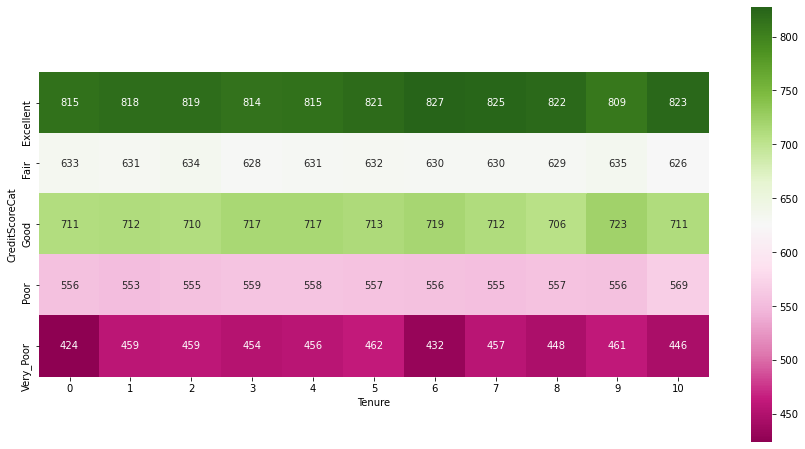

In [ ]:
plt.figure(figsize = (15,8))
heatmap = sns.heatmap(data = pivot, cmap='PiYG', annot=True, fmt='.0f', square=True)
heatmap